<a href="https://colab.research.google.com/github/njafarov/Optimization_NLP/blob/main/Challenge_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

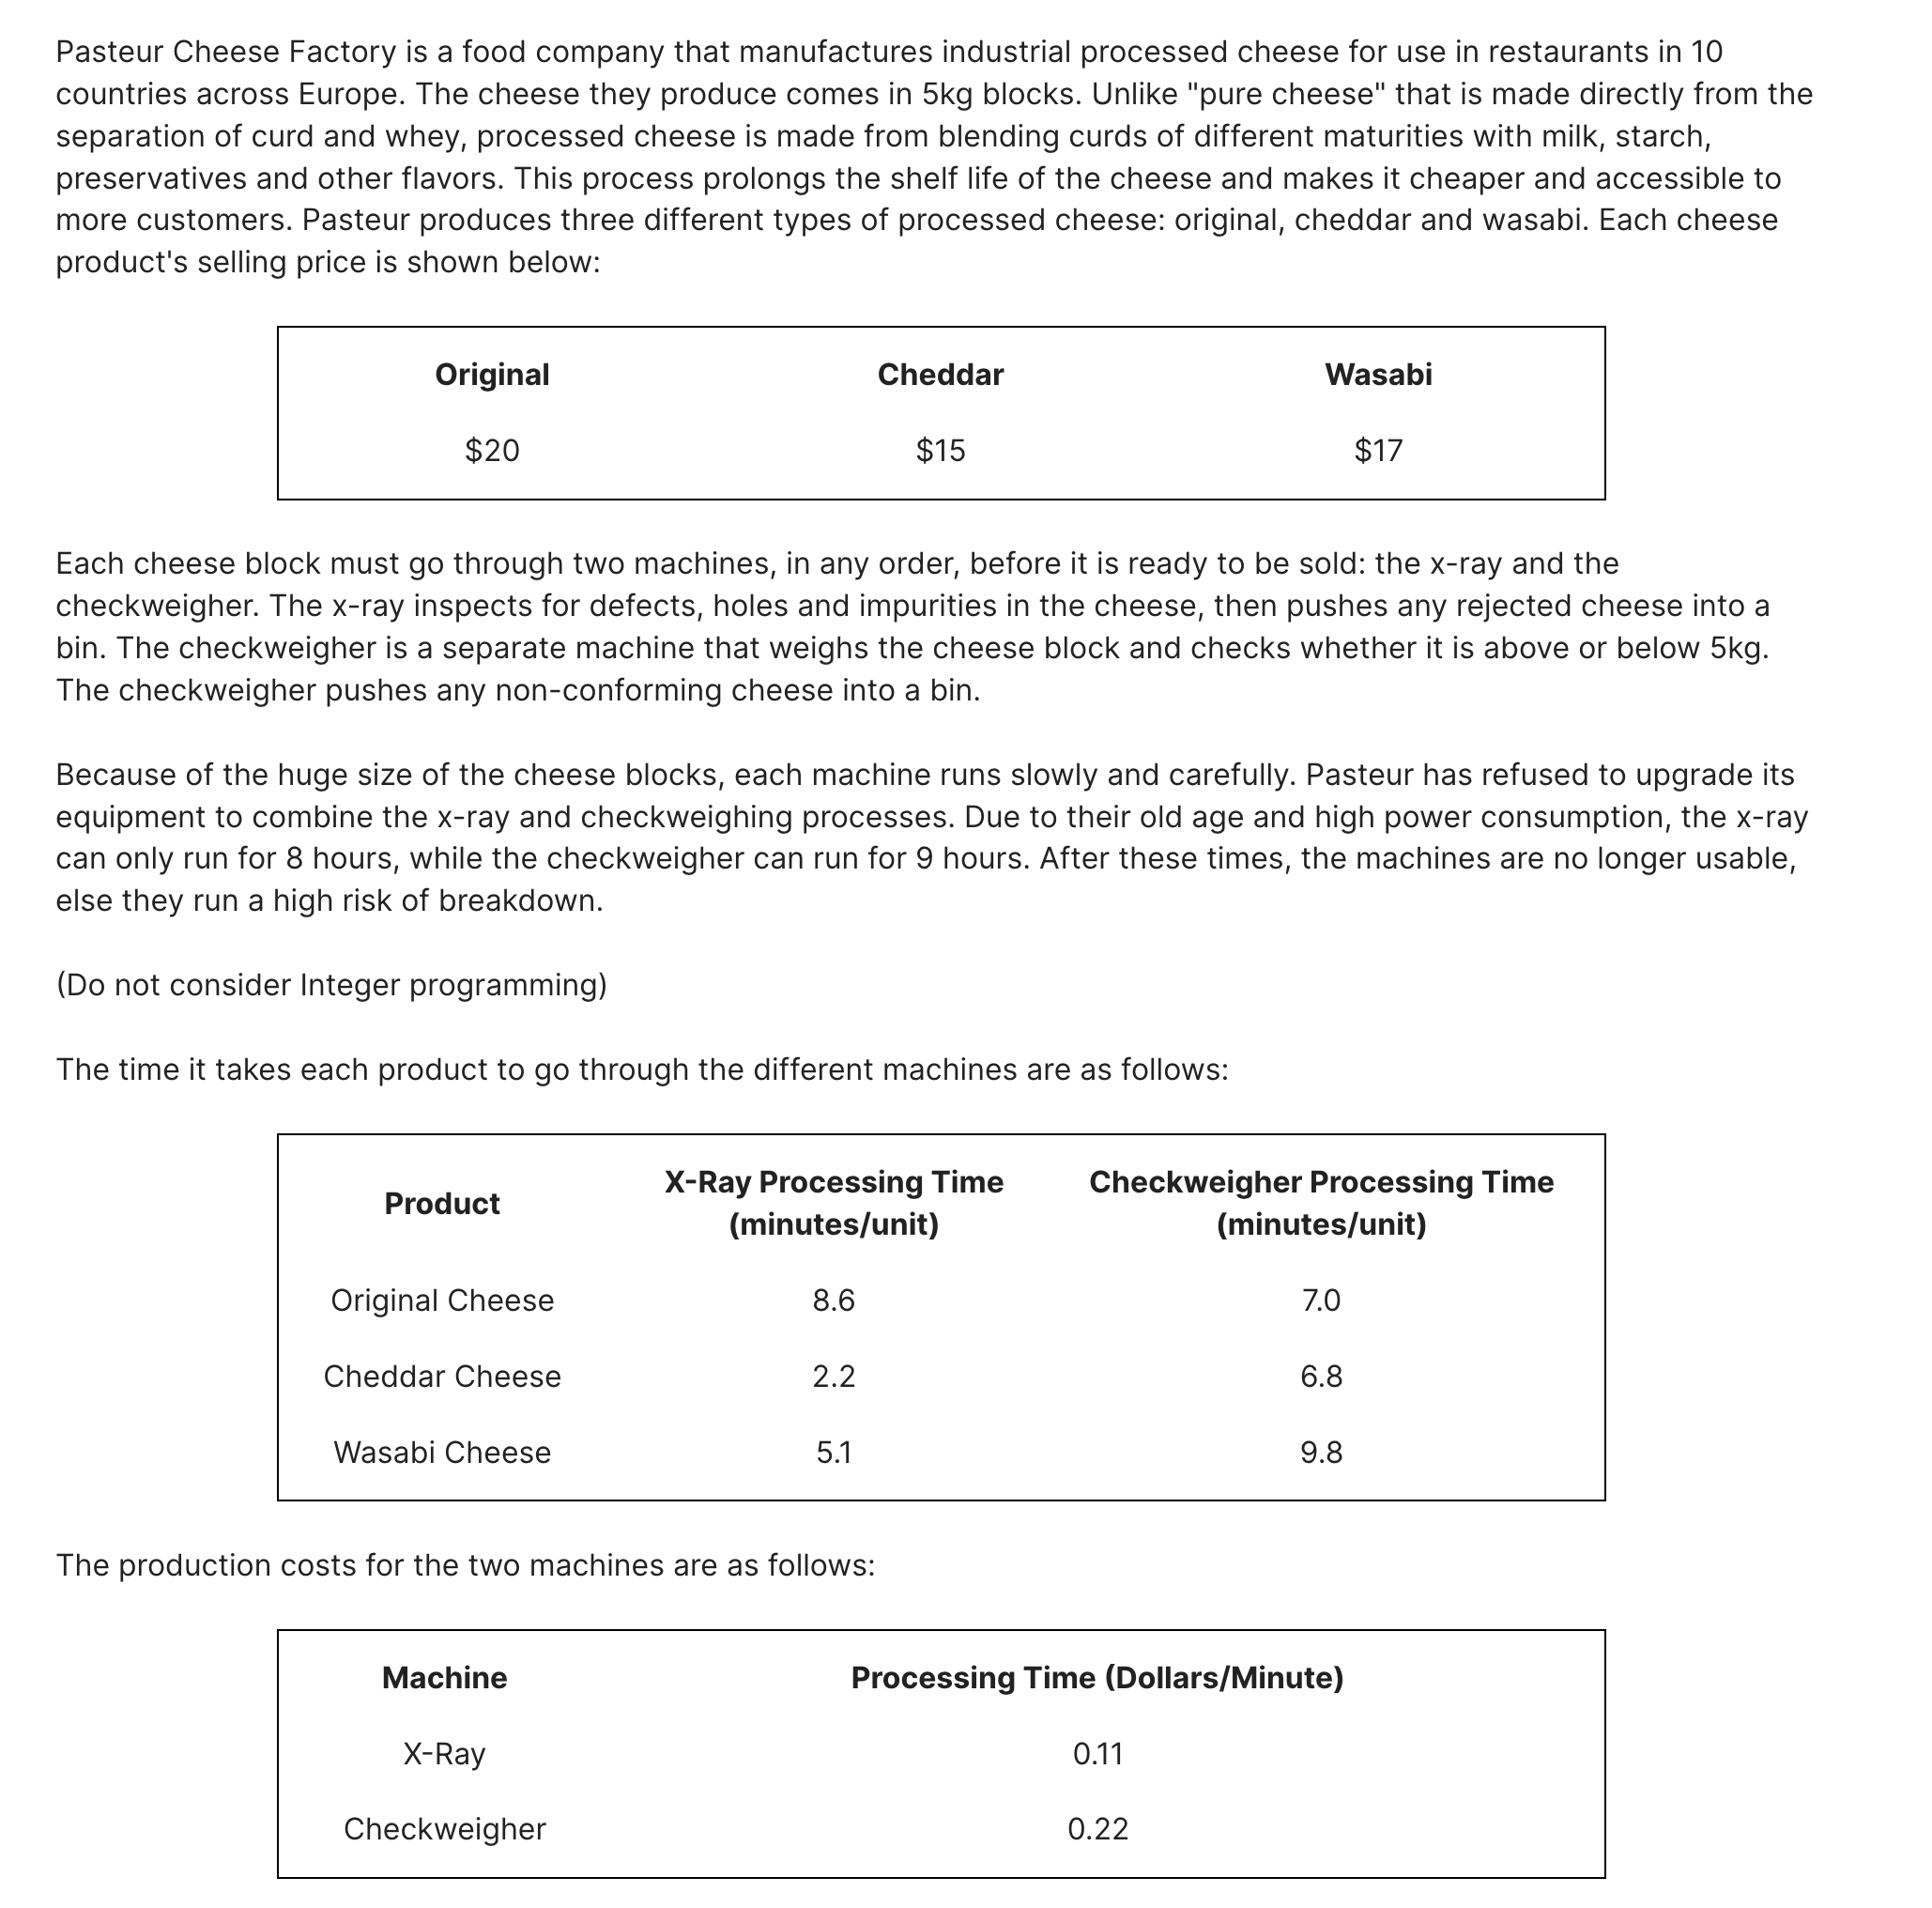

In [1]:
!pip install pyomo
!wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
!unzip -o -q ipopt-linux64
import pyomo.environ as pyo
from pyomo.opt import SolverFactory

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.7 MB 7.9 MB/s 
     |████████████████████████████████| 49 kB 6.2 MB/s 


In [3]:
from ast import expr
# Define the model
model = pyo.ConcreteModel()

# Define sets
model.i = pyo.Set(initialize=['Original','Cheddar','Wasabi'])


#Parameters
model.X = pyo.Param(model.i, initialize={'Original':8.6,'Cheddar':2.2,'Wasabi':5.1})
X = model.X # X_Ray scanning of cheese 

model.S_Price = pyo.Param(model.i, initialize={'Original':20,'Cheddar':15,'Wasabi':17})
S_Price = model.S_Price # Sales price

model.Ch = pyo.Param(model.i, initialize={'Original':7,'Cheddar':6.8,'Wasabi':9.8})
Ch = model.Ch




# Decision variable
model.x = pyo.Var(model.i, domain=pyo.NonNegativeReals)
x = model.x


#Objective function
def objective_function(model,i):
  return sum(x[i]*S_Price[i] for i in model.i)-sum(x[i]*X[i] for i in model.i)*0.11-sum(x[i]*Ch[i] for i in model.i)*0.22 

  
model.Obj = pyo.Objective(rule=objective_function, sense=pyo.maximize)

#Constrains
def cons1(model,i):
  return sum(x[i]*X[i] for i in model.i)<=480
model.Cons1 = pyo.Constraint(model.i, rule=cons1)

def cons2(model,i):
  return sum(x[i]*Ch[i] for i in model.i)<=540
model.Cons2 = pyo.Constraint(model.i, rule=cons2)



# Solution
Solver = SolverFactory('ipopt',executable = '/content/ipopt')
results = Solver.solve(model)

print(results)
print("Objective function: ", model.Obj())
for i in model.i:
  print("The amount of product ",i,"is ", x[i]())


Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 6
  Number of variables: 3
  Sense: unknown
Solver: 
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.03375411033630371
Solution: 
- number of solutions: 0
  number of solutions displayed: 0

Objective function:  1239.263522321328
The amount of product  Original is  48.1894155248677
The amount of product  Cheddar is  29.80501423758071
The amount of product  Wasabi is  0.0
